In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set()

Even though each time the plot looks different due to randomness, it is consistent that the update rule for PPO with original KL results in large ups and downs, while the MW update rule consistently converges to theta = 1.

0.9602685098695357
0.9980682135578609
0.9022028131241703


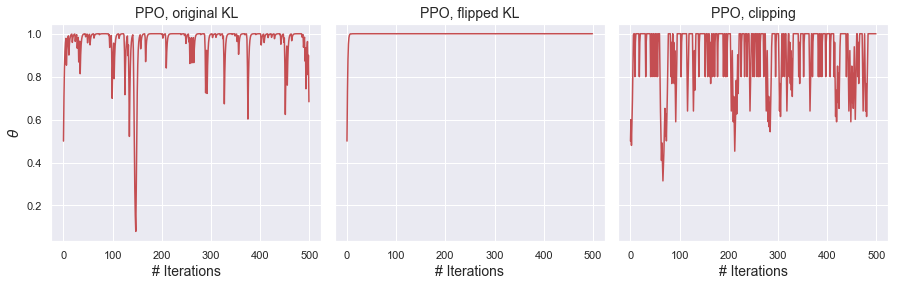

In [11]:
n = 500
fig, axes = plt.subplots(1, 3, figsize=(15,4), sharey=True)

# Simulation for KL penalty with original diretion,
# based on the closed-form update rule in Table 2.
thetas = np.zeros(n)
# Start with 0.5 probability on action 1.
thetas[0] = 0.5
for i in range(0, n-1):
    # Update rules in the top rows in Table 2.
    if np.random.rand() <= 0.8:
        thetas[i+1] = np.sqrt(thetas[i]) 
    else:
        thetas[i+1] = 1 - np.sqrt(1-thetas[i])
        
sns.lineplot(x=np.arange(n),y=thetas,ax=axes[0], color='r')
print(np.mean(thetas))

# Simulation for KL penalty with flipped diretion,
# based on the closed-form update rule in Table 2.
thetas = np.zeros(n)
thetas[0] = 0.5
for i in range(0, n-1):
    # Update rules in the bottom rows in Table 2.
    if np.random.rand() <= 0.8:
        thetas[i+1] = thetas[i] * np.exp(0.5) / (
            thetas[i] * np.exp(0.5) + (1-thetas[i]) * np.exp(-0.5))
    else:
        thetas[i+1] = thetas[i] * np.exp(-0.5) / (
            (1-thetas[i]) * np.exp(0.5) + thetas[i] * np.exp(-0.5))
        
sns.lineplot(x=np.arange(n),y=thetas,ax=axes[1], color='r')
print(np.mean(thetas))

# Simulation for clipping,
# based on the closed-form update rule in Table 2.
thetas = np.zeros(n)
thetas[0] = 0.5
epsilon = 0.2
for i in range(0, n-1):
    # Update rules in the bottom rows in Table 2.
    if np.random.rand() <= 0.8:
        thetas[i+1] = np.minimum(1.0, (1+epsilon)*thetas[i])
    else:
        thetas[i+1] = (1-epsilon)*thetas[i]
        
sns.lineplot(x=np.arange(n),y=thetas,ax=axes[2], color='r')
print(np.mean(thetas))

axes[0].set_ylabel(r'$\theta$', fontsize=14)
axes[0].set_xlabel('# Iterations', fontsize=14)
axes[1].set_xlabel('# Iterations', fontsize=14)
axes[2].set_xlabel('# Iterations', fontsize=14)
axes[0].set_title('PPO, original KL', fontsize=14)
axes[1].set_title('PPO, flipped KL', fontsize=14)
axes[2].set_title('PPO, clipping', fontsize=14)
plt.subplots_adjust(wspace=0.05)
plt.show()

0.9626533230564681
0.9678612161412962
0.975


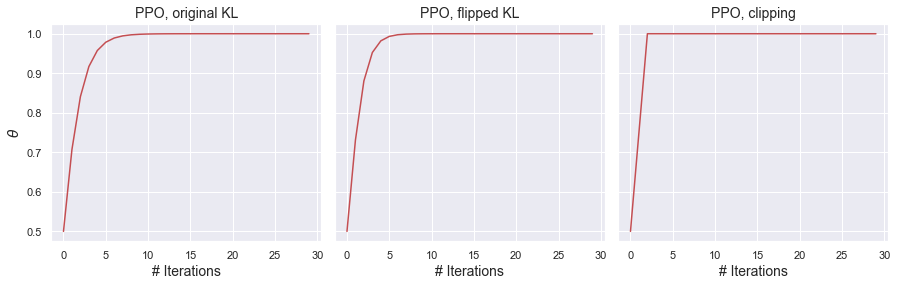

In [10]:
# Less Noise

n = 30
fig, axes = plt.subplots(1, 3, figsize=(15,4), sharey=True)

# Simulation for KL penalty with original diretion,
# based on the closed-form update rule in Table 2.
thetas = np.zeros(n)
# Start with 0.5 probability on action 1.
thetas[0] = 0.5
for i in range(0, n-1):
    # Update rules in the top rows in Table 2.
    thetas[i+1] = np.sqrt(thetas[i]) 
        
sns.lineplot(x=np.arange(n),y=thetas,ax=axes[0], color='r')
print(np.mean(thetas))

# Simulation for KL penalty with flipped diretion,
# based on the closed-form update rule in Table 2.
thetas = np.zeros(n)
thetas[0] = 0.5
for i in range(0, n-1):
    # Update rules in the bottom rows in Table 2.
    thetas[i+1] = thetas[i] * np.exp(0.5) / (
        thetas[i] * np.exp(0.5) + (1-thetas[i]) * np.exp(-0.5))
        
sns.lineplot(x=np.arange(n),y=thetas,ax=axes[1], color='r')
print(np.mean(thetas))

# Simulation for clipping,
# based on the closed-form update rule in Table 2.
thetas = np.zeros(n)
thetas[0] = 0.5
epsilon = 0.5
for i in range(0, n-1):
    # Update rules in the bottom rows in Table 2.
    thetas[i+1] = np.minimum(1.0, (1+epsilon)*thetas[i])
        
sns.lineplot(x=np.arange(n),y=thetas,ax=axes[2], color='r')
print(np.mean(thetas))

axes[0].set_ylabel(r'$\theta$', fontsize=14)
axes[0].set_xlabel('# Iterations', fontsize=14)
axes[1].set_xlabel('# Iterations', fontsize=14)
axes[2].set_xlabel('# Iterations', fontsize=14)
axes[0].set_title('PPO, original KL', fontsize=14)
axes[1].set_title('PPO, flipped KL', fontsize=14)
axes[2].set_title('PPO, clipping', fontsize=14)
plt.subplots_adjust(wspace=0.05)
plt.show()

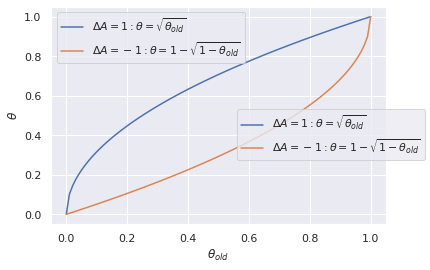

In [11]:
# Visualization of the square root update rule.
fig = plt.figure()
x = np.linspace(0, 1, 100)
ax = sns.lineplot(x=x, y=np.sqrt(x),
                  label=r'$\Delta A = 1: \theta=\sqrt{\theta_{old}}$')
sns.lineplot(x=x, y=1-np.sqrt(1-x),
             label=r'$\Delta A = -1: \theta=1-\sqrt{1-\theta_{old}}$',
             ax=ax)
ax.set_xlabel(r'$\theta_{old}$')
ax.set_ylabel(r'$\theta$')
fig.legend(loc='right')
plt.show()